In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Columns

In [4]:
column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]

In [5]:
# assign names to columns , save in dict_list
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

i=1
for x in dict_list :
    Sensor_dictionary[f'sm_{i}']=x
    i+=1

In [6]:
Sensor_dictionary

{'sm_1': '(Fan inlet temperature) (◦R)',
 'sm_2': '(LPC outlet temperature) (◦R)',
 'sm_3': '(HPC outlet temperature) (◦R)',
 'sm_4': '(LPT outlet temperature) (◦R)',
 'sm_5': '(Fan inlet Pressure) (psia)',
 'sm_6': '(bypass-duct pressure) (psia)',
 'sm_7': '(HPC outlet pressure) (psia)',
 'sm_8': '(Physical fan speed) (rpm)',
 'sm_9': '(Physical core speed) (rpm)',
 'sm_10': '(Engine pressure ratio(P50/P2)',
 'sm_11': '(HPC outlet Static pressure) (psia)',
 'sm_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sm_13': '(Corrected fan speed) (rpm)',
 'sm_14': '(Corrected core speed) (rpm)',
 'sm_15': '(Bypass Ratio) ',
 'sm_16': '(Burner fuel-air ratio)',
 'sm_17': '(Bleed Enthalpy)',
 'sm_18': '(Required fan speed)',
 'sm_19': '(Required fan conversion speed)',
 'sm_20': '(High-pressure turbines Cool air flow)',
 'sm_21': '(Low-pressure turbines Cool air flow)'}

In [7]:
column_names

['engine',
 'time',
 'op_setting_1',
 'op_setting_2',
 'op_setting_3',
 'sm_1',
 'sm_2',
 'sm_3',
 'sm_4',
 'sm_5',
 'sm_6',
 'sm_7',
 'sm_8',
 'sm_9',
 'sm_10',
 'sm_11',
 'sm_12',
 'sm_13',
 'sm_14',
 'sm_15',
 'sm_16',
 'sm_17',
 'sm_18',
 'sm_19',
 'sm_20',
 'sm_21']

# RUL_DF001

## Load Data

In [8]:
data_val = pd.read_csv('/content/drive/MyDrive/NASA/CMAPSSData/test_FD001.txt', sep=" ", header=None, names=column_names, index_col=False)
y_val = pd.read_csv('/content/drive/MyDrive/NASA/CMAPSSData/RUL_FD001.txt', sep=" ", header=None, names=['RUL'])

<ipython-input-8-1eda8f082087>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data_val = pd.read_csv('/content/drive/MyDrive/NASA/CMAPSSData/test_FD001.txt', sep=" ", header=None, names=column_names, index_col=False)


In [9]:
data_val.shape, y_val.shape

((13096, 26), (100, 1))

In [10]:
#training data
data_train = pd.read_csv('/content/drive/MyDrive/NASA/CMAPSSData/train_FD001.txt', sep=" ", header=None, names=column_names, index_col=False)
data_train.head()

<ipython-input-10-c272a1d81e01>:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data_train = pd.read_csv('/content/drive/MyDrive/NASA/CMAPSSData/train_FD001.txt', sep=" ", header=None, names=column_names, index_col=False)


,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [11]:
data_train.shape

(20631, 26)

## 2 Approaches

1. We make it a static model => data_train=df, data_val=df_val, prediction of RUL failure points of engine and solve it using basic ml algorithms

2. Dynammic RUL prediction, predict RUL at each time step make pattern capture time essence and make it a time series dataset

### Approach 1

In [12]:
df = data_train.copy()
df_val = data_val.copy()

df.shape, df_val.shape

((20631, 26), (13096, 26))

In [13]:
# detect and drop constant features

# constant features are those features whose value remains almost the same throughout the columns
# and doesnt change much as a result they dont provide actual value in machine learning

def constant_feature(df):
    constant_feature = []
    for col in df.columns:
        if abs(df[col].std() < 0.02):
            constant_feature.append(col)

    return constant_feature

In [14]:
constant_feature(df)

['op_setting_1',
 'op_setting_2',
 'op_setting_3',
 'sm_1',
 'sm_5',
 'sm_6',
 'sm_10',
 'sm_16',
 'sm_18',
 'sm_19']

In [15]:
df = df.drop(columns=constant_feature(df))
df_val = df_val.drop(columns=constant_feature(df_val))

df.shape, df_val.shape

((20631, 16), (13096, 16))

In [16]:
# create RUL feature in training dataset

# RUL - rest useful life for each engine's instant
# for engine 1 max time will be true RUL and we can substract each engine time with max time giving us RUL for each engine
# for every engine take its max time and then substract it with its time

def create_rul(df):
    df['RUL'] = df.groupby('engine')['time'].transform('max') - df['time']
    return df


create_rul(df)

,engine,time,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [17]:
# detect high correlated features

# np.ones(shape) => gives a matrix of that shape with all ones
# np.triu(matrix, k=1) => this function extracts the upper triangle of the matrix including diagonal (k=1) and ensures upper traingle sets it to true

mask = np.triu(np.ones(df.shape)).astype(bool)

In [18]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
df_corr = df.corr()
mask = np.tril(np.ones(df_corr.shape), k=-1).astype(bool)
df_corr = df_corr.where(mask)
df_corr

,engine,time,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,RUL
engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,0.078753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_2,0.014133,0.549898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_3,0.012621,0.543947,0.602610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_4,0.026116,0.624577,0.714949,0.678413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_7,-0.032073,-0.595914,-0.702136,-0.664595,-0.793130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_8,0.039929,0.475977,0.662325,0.602481,0.746852,-0.767132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_9,-0.052053,0.443999,0.273764,0.322964,0.297429,-0.217835,-0.032091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_11,0.024707,0.634385,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_12,-0.031882,-0.611354,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Correlation'}>

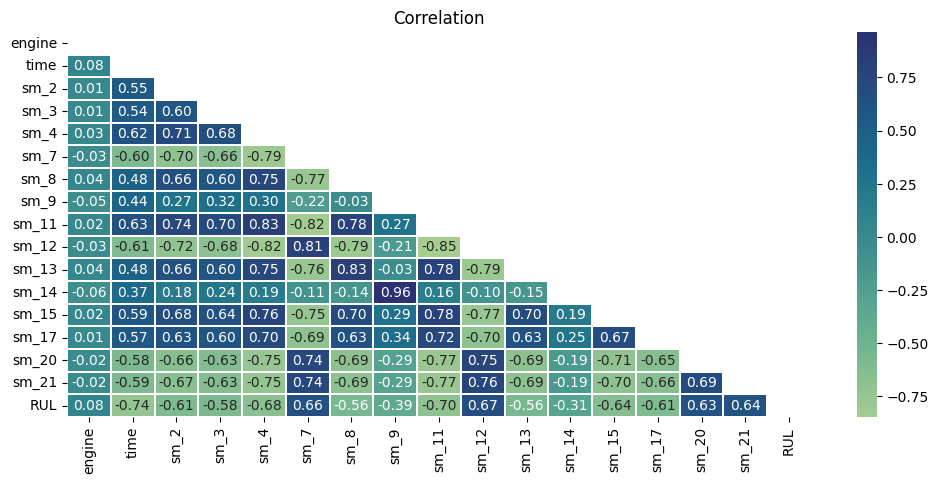

In [20]:
plt.figure(figsize=(12,5))
plt.title('Correlation')
sns.heatmap(df_corr, annot=True, fmt='0.2f', cmap='crest' ,linewidths=0.01)

<Axes: title={'center': 'Very high correlation'}>

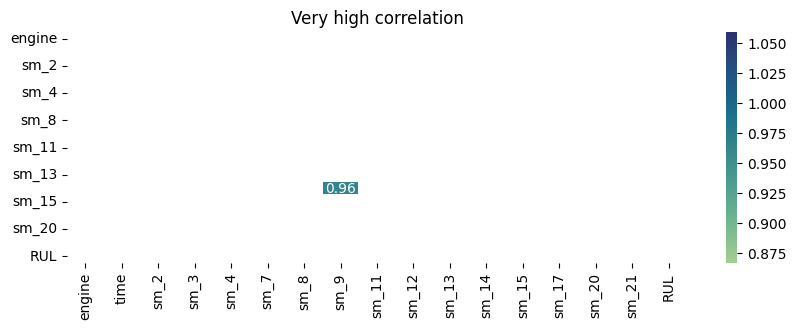

In [21]:
plt.figure(figsize=(10,3))
plt.title('Very high correlation')
mask = df_corr.where( abs(df_corr) > 0.90).isna()
sns.heatmap(df_corr, annot=True, fmt='0.2f', cmap='crest', linewidths=0.01, mask=mask)

In [22]:
df = df.drop(columns=['sm_9'])
df.columns

Index(['engine', 'time', 'sm_2', 'sm_3', 'sm_4', 'sm_7', 'sm_8', 'sm_11',
       'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21', 'RUL'],
      dtype='object')

In [23]:
data_train['time'].describe()

,time
count,20631.000000
mean,108.807862
std,68.880990
min,1.000000
25%,52.000000
50%,104.000000
75%,156.000000
max,362.000000


In [24]:
failure_time = df.groupby('engine')['RUL'].transform('max')
failure_time

,RUL
0,191
1,191
2,191
3,191
4,191
...,...
20626,199
20627,199
20628,199
20629,199


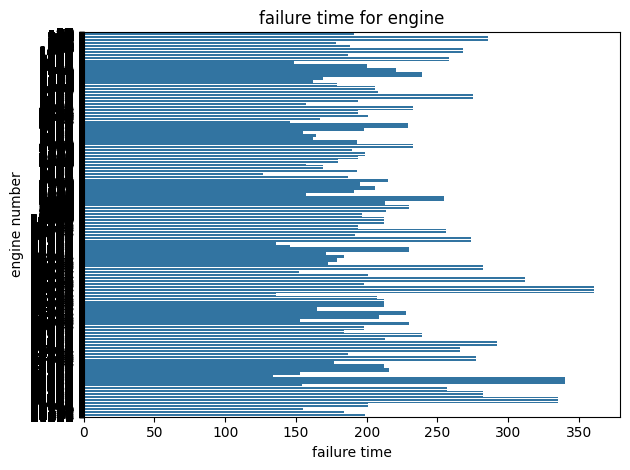

In [25]:
sns.barplot(y = failure_time.index , x = failure_time.values , orient='h')
plt.title('failure time for engine')
plt.xlabel('failure time')
plt.ylabel('engine number')
plt.tight_layout()
plt.show()

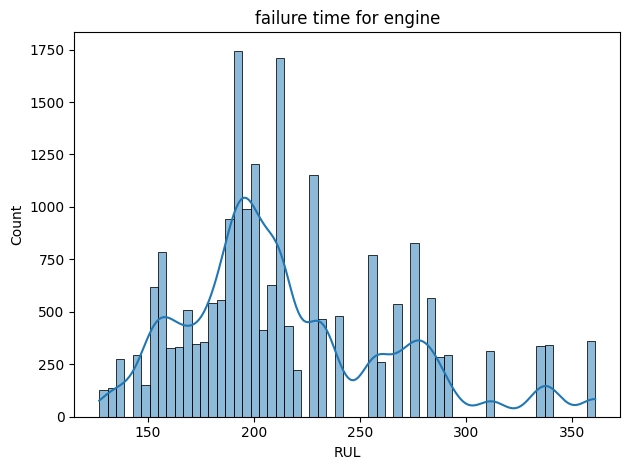

In [26]:
sns.histplot(failure_time , kde=True)
plt.title('failure time for engine')
plt.tight_layout()

In [27]:
# sensor visualisation

In [31]:
def plot_signal(df, signal_name, Sensor_dictionary):
    fig = plt.figure(figsize=(10,4))
    for engine in df['engine'].unique():
        if (engine%10 == 0):
            # print(engine)
            rolling_window = df[df['engine'] == engine].rolling(10).mean()
            sns.lineplot(data=rolling_window, x='RUL', y=signal_name, label=engine)

    plt.tight_layout(), plt.xlim(250, 0)
    plt.xlabel('Remaining Useful Life (RUL)') , plt.ylabel(Sensor_dictionary[signal_name])
    plt.show()

<Figure size 1000x400 with 0 Axes>

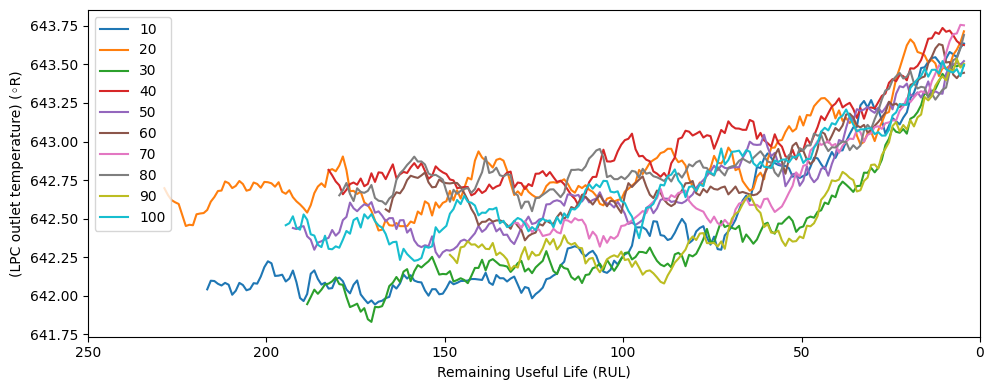

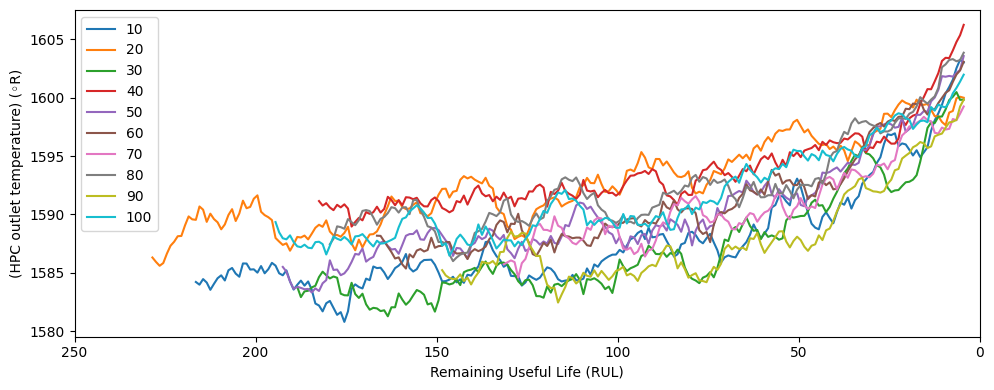

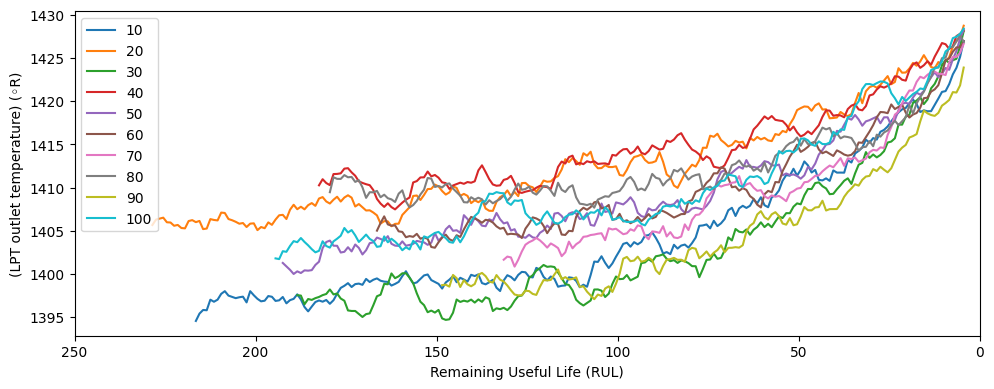

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

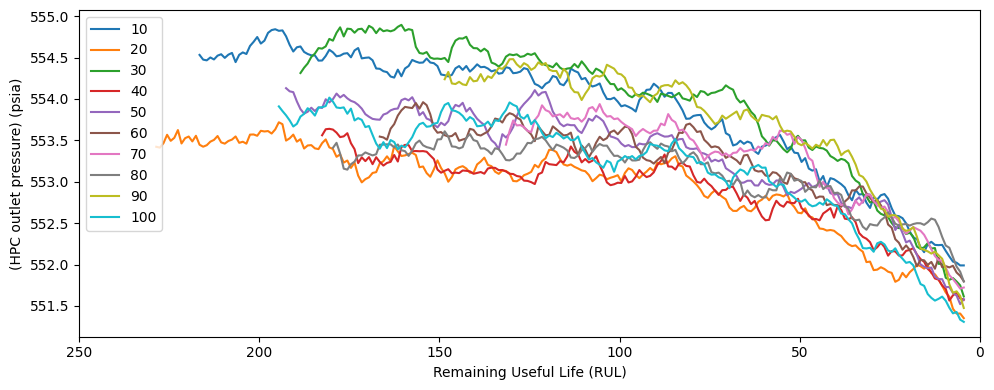

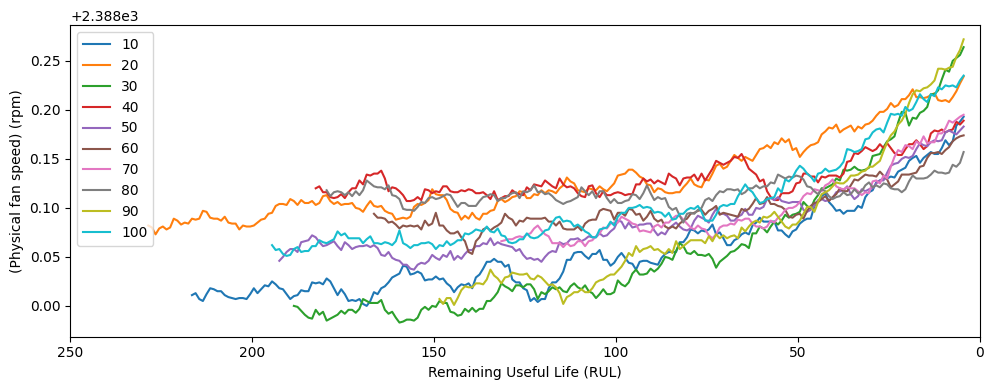

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

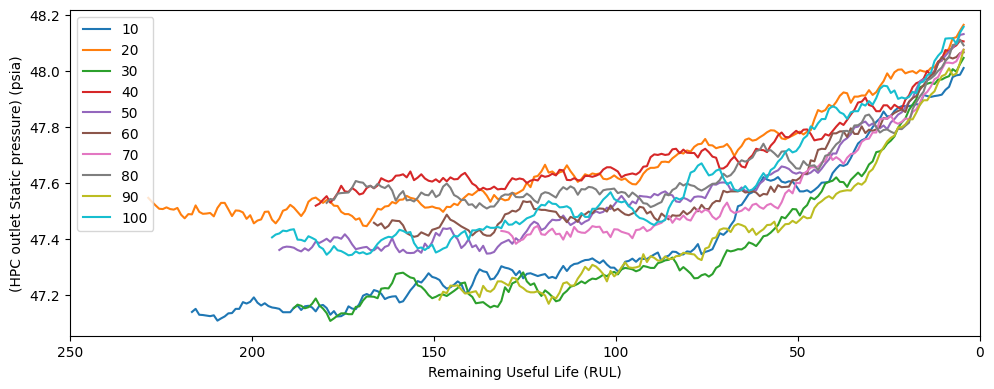

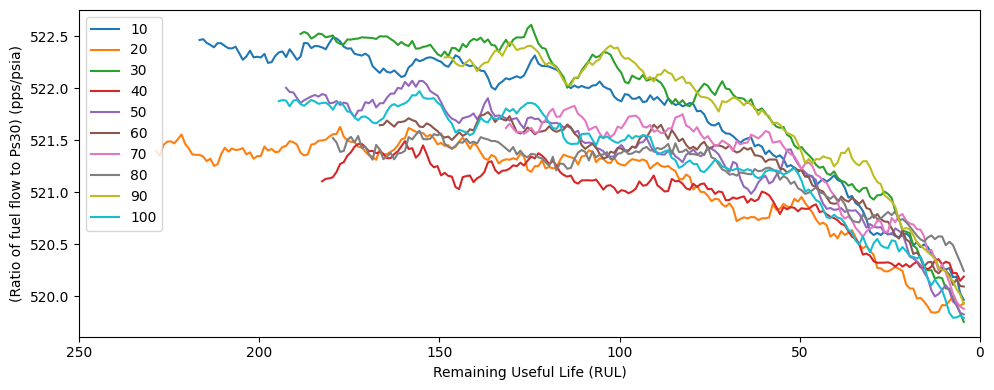

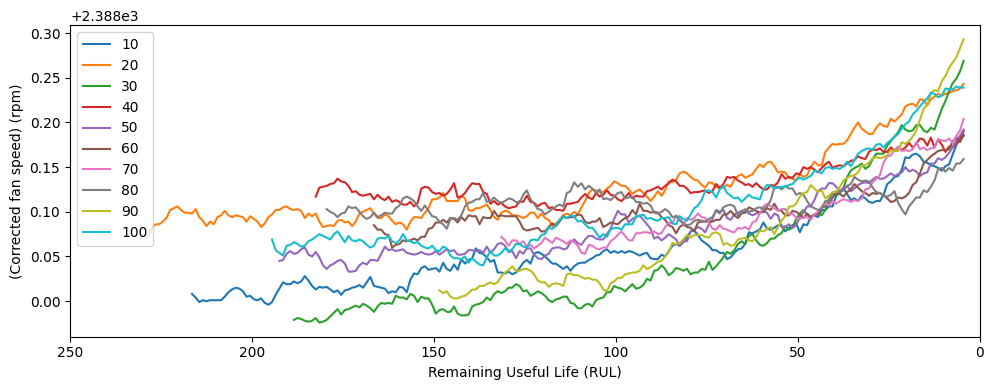

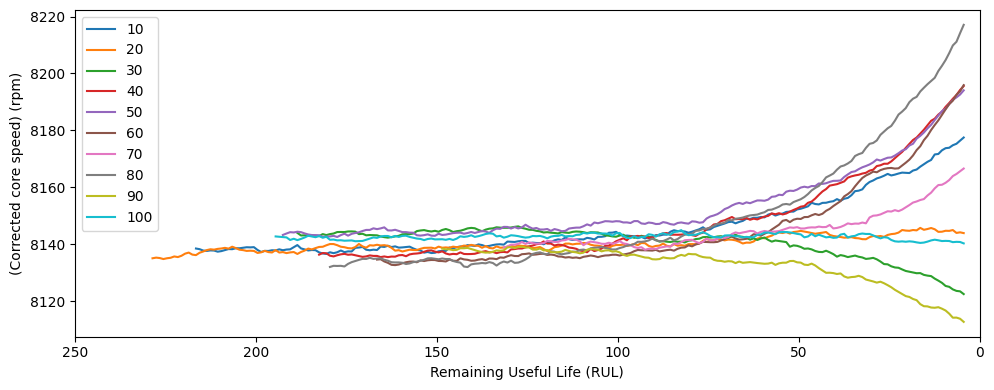

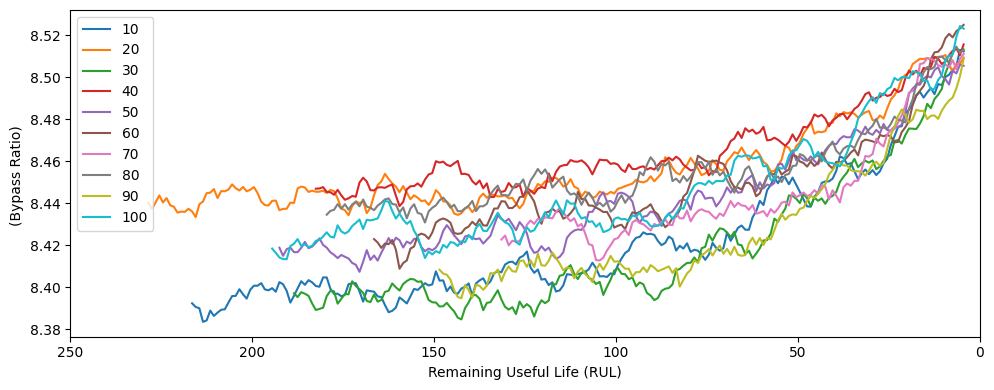

<Figure size 1000x400 with 0 Axes>

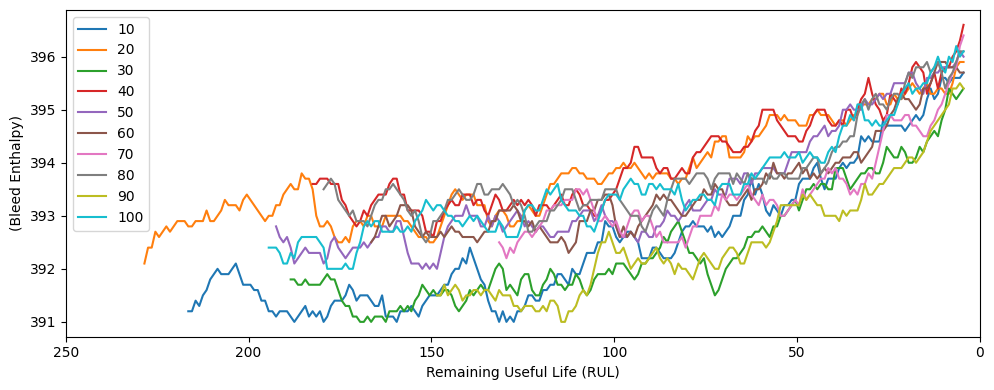

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

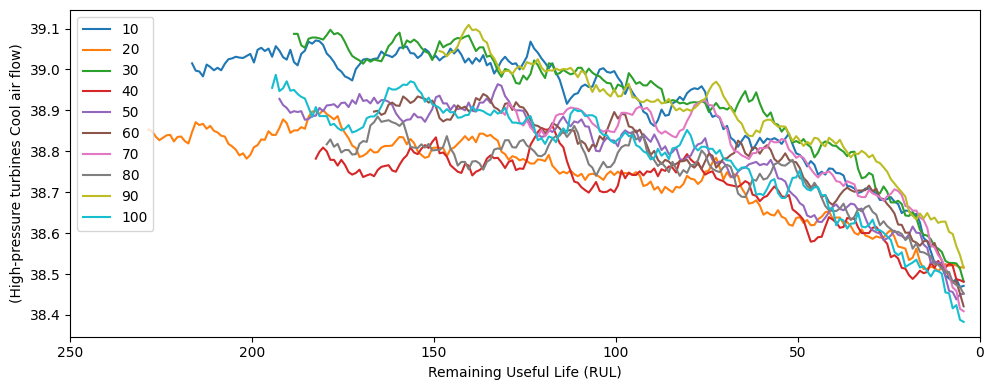

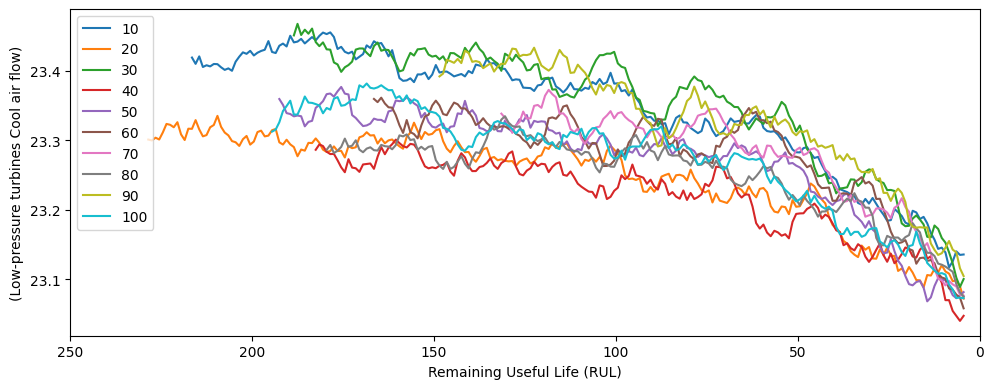

In [32]:
for i in range(1,22):
    try:
        plot_signal(df, 'sm_'+str(i), Sensor_dictionary)
    except:
        pass

### Feature selection

In [33]:
df.columns

Index(['engine', 'time', 'sm_2', 'sm_3', 'sm_4', 'sm_7', 'sm_8', 'sm_11',
       'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21', 'RUL'],
      dtype='object')

In [34]:
features = df.columns[2:-1]
features

Index(['sm_2', 'sm_3', 'sm_4', 'sm_7', 'sm_8', 'sm_11', 'sm_12', 'sm_13',
       'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df['RUL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# df_val.shape

(13096, 16)

In [36]:
X_val = df_val.groupby('engine').last().reset_index()    # take last row per engine , shows max time
X_val = X_val[features]   # no need for time in val set too
X_val

,sm_2,sm_3,sm_4,sm_7,sm_8,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21
0,642.58,1581.22,1398.91,554.42,2388.08,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
1,642.55,1586.59,1410.83,553.52,2388.10,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
2,642.88,1589.75,1418.89,552.59,2388.16,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
3,642.78,1594.53,1406.88,552.64,2388.13,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
4,642.27,1589.94,1419.36,553.29,2388.10,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,642.30,1590.88,1397.94,553.99,2388.03,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606
96,642.59,1582.96,1410.92,554.05,2388.06,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953
97,642.68,1599.51,1415.47,553.44,2388.13,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608
98,642.00,1585.03,1397.98,554.75,2388.01,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595


In [37]:
X_train.shape, X_test.shape, X_val.shape

((16504, 13), (4127, 13), (100, 13))

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scalar = MinMaxScaler(feature_range=(0,1))
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
X_val = scalar.transform(X_val)

In [42]:
from sklearn.metrics import r2_score, root_mean_squared_error

def metrics(y_true, y_pred, label='train'):
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'for {label} set, \nRMSE: {rmse} \nR2 Score: {r2*100:0.2f}%')

In [50]:
np.isnan(X_val).any()

False

In [54]:
y_val = pd.read_csv('/content/drive/MyDrive/NASA/CMAPSSData/RUL_FD001.txt', header=None, names=['RUL'])
y_val

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


### Linear Regression


In [68]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = linear.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = linear.predict(X_val)
metrics(y_val , y_pred , label = 'val')

for train set, 
RMSE: 44.81703159346719 
R2 Score: 58.05%
for test set, 
RMSE: 44.29440154746172 
R2 Score: 57.06%
for val set, 
RMSE: 31.869509481580092 
R2 Score: 41.18%


Text(0, 0.5, 'true y')

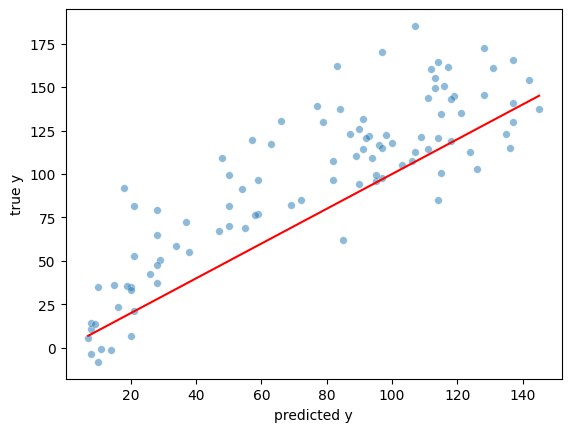

In [69]:
sns.scatterplot(x = y_val['RUL'] , y = y_pred  , s = 30 , alpha = 0.5)

sns.lineplot( x = [ min(y_val['RUL'])  , max(y_val['RUL']) ] ,
             y = [min(y_val['RUL']) , max(y_val['RUL'])] , color = 'red')


plt.xlabel('predicted y')
plt.ylabel('true y')

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

decision = DecisionTreeRegressor()
decision.fit(X_train, y_train)

y_pred = decision.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = decision.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = decision.predict(X_val)
metrics(y_val , y_pred , label = 'val')

for train set, 
RMSE: 0.0 
R2 Score: 100.00%
for test set, 
RMSE: 60.06634527542682 
R2 Score: 21.03%
for val set, 
RMSE: 45.890086075316965 
R2 Score: -21.95%


Text(0, 0.5, 'true y')

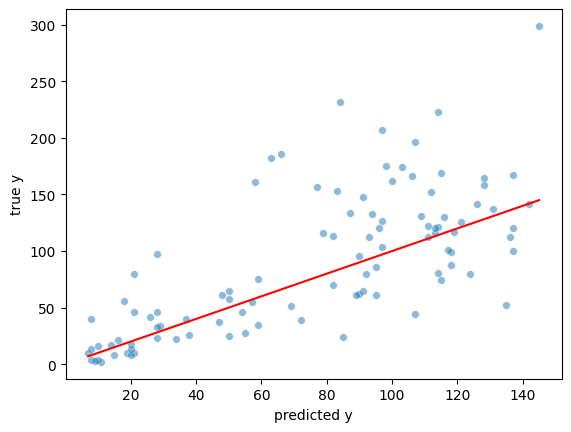

In [71]:
sns.scatterplot(x = y_val['RUL'] , y = y_pred  , s = 30 , alpha = 0.5)

sns.lineplot( x = [ min(y_val['RUL'])  , max(y_val['RUL']) ] ,
             y = [min(y_val['RUL']) , max(y_val['RUL'])] , color = 'red')


plt.xlabel('predicted y')
plt.ylabel('true y')

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = random_forest.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = random_forest.predict(X_val)
metrics(y_val , y_pred , label = 'val')

for train set, 
RMSE: 15.772192460495354 
R2 Score: 94.80%
for test set, 
RMSE: 41.37243813773398 
R2 Score: 62.54%
for val set, 
RMSE: 32.918451497602376 
R2 Score: 37.25%


In [59]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from scipy.stats import randint   # it returen range of dist , not single value like np.random.randint

RandomForestRegressor()
param ={
    'max_depth' : [None , 10,20] ,
    'min_samples_split' : randint(2,10) ,
    'min_samples_leaf' :  randint(1,5)
}
random_search_forest = RandomizedSearchCV(estimator=random_forest, param_distributions=param , n_iter=10 , cv = 5 , scoring = 'r2' , random_state=42 , n_jobs=-1)

random_search_forest.fit(X_train , y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c98fa765b10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c98fa7af280>},
                   random_state=42, scoring='r2')

In [60]:
df_res_forest = pd.DataFrame(random_search_forest.cv_results_).sort_values('mean_test_score')
df_res_forest[['mean_test_score' , 'params']]

,mean_test_score,params
6,0.630677,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
2,0.631784,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
9,0.631840,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
1,0.632037,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
4,0.632603,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
0,0.632861,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_..."
5,0.633073,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
3,0.635490,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_..."
8,0.635502,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
7,0.635655,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."


In [61]:
model_fine_forest = random_search_forest.best_estimator_
print(model_fine_forest)

y_pred = model_fine_forest.predict(X_val)
metrics(y_val , y_pred, label = 'val')

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5)
for val set, 
RMSE: 31.827744987794997 
R2 Score: 41.34%


In [62]:
features

Index(['sm_2', 'sm_3', 'sm_4', 'sm_7', 'sm_8', 'sm_11', 'sm_12', 'sm_13',
       'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21'],
      dtype='object')

Text(0.5, 1.0, 'random forest model')

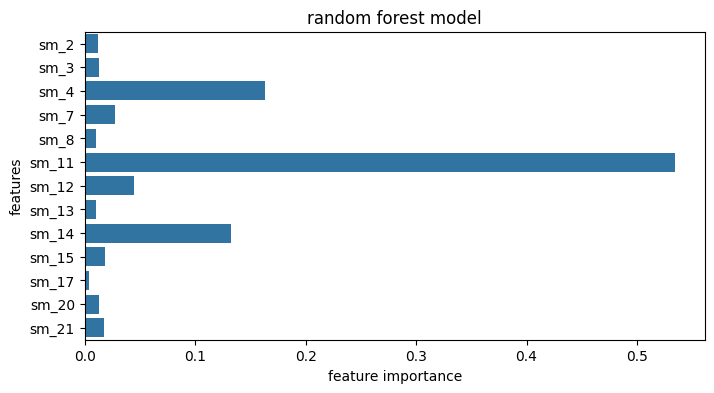

In [63]:
plt.figure(figsize = (8,4))
sns.barplot(y = features , x = model_fine_forest.feature_importances_ )
plt.xlabel('feature importance')
plt.ylabel('features')
plt.title('random forest model')

### SVM

In [72]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = svr.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = svr.predict(X_val)
metrics(y_val , y_pred , label = 'val')

for train set, 
RMSE: 42.91023622489475 
R2 Score: 61.54%
for test set, 
RMSE: 42.252001997340244 
R2 Score: 60.93%
for val set, 
RMSE: 26.14721585018976 
R2 Score: 60.41%


In [73]:
# i did the finetuning and the base model is performing much better
# whereas when finetuning the alidation score is reaching to 55.8% so in svr the base model is best

Text(0, 0.5, 'true y')

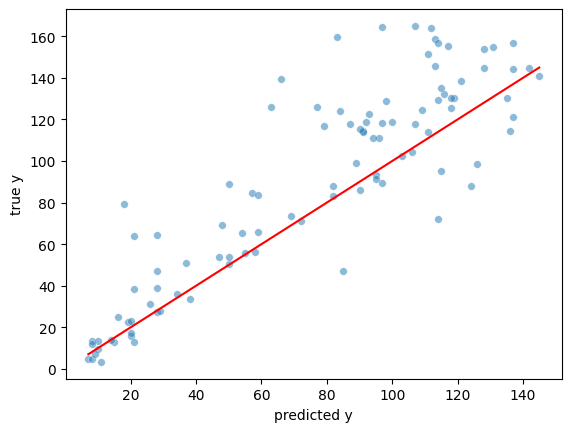

In [74]:
sns.scatterplot(x = y_val['RUL'] , y = y_pred  , s = 30 , alpha = 0.5)

sns.lineplot( x = [ min(y_val['RUL'])  , max(y_val['RUL']) ] ,
             y = [min(y_val['RUL']) , max(y_val['RUL'])] , color = 'red')


plt.xlabel('predicted y')
plt.ylabel('true y')

### XG Boost

In [76]:
import xgboost as xgb

xgb = xgb.XGBRegressor(n_estimators = 20 , max_depth = 6, learning_rate = 0.1 , reg_lambda = 0.02 , gamma = 0.4 , random_state = 42 )
xgb.fit(X_train , y_train )

y_pred = xgb.predict(X_train)
metrics(y_train , y_pred)

y_pred = xgb.predict(X_test)
metrics(y_test , y_pred)

y_pred = xgb.predict(X_val)
metrics(y_val , y_pred)

for train set, 
RMSE: 40.49779657566336 
R2 Score: 65.75%
for train set, 
RMSE: 41.77202071803215 
R2 Score: 61.81%
for train set, 
RMSE: 29.79369942060544 
R2 Score: 48.60%


Text(0, 0.5, 'true y')

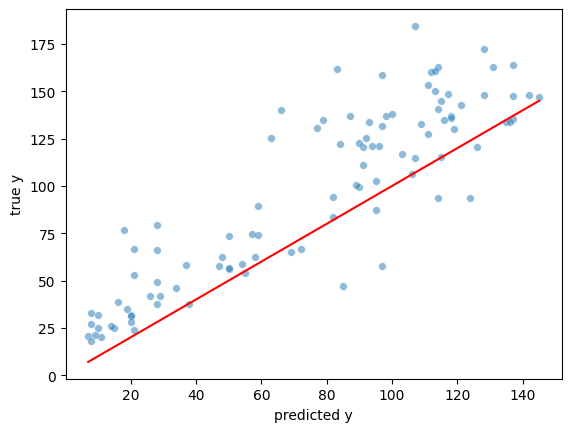

In [77]:
sns.scatterplot(x = y_val['RUL'] , y = y_pred  , s = 30 , alpha = 0.5)

sns.lineplot( x = [ min(y_val['RUL'])  , max(y_val['RUL']) ] ,
             y = [min(y_val['RUL']) , max(y_val['RUL'])] , color = 'red')


plt.xlabel('predicted y')
plt.ylabel('true y')

### Results for Approach 1:

1. SVM has the highest testing (60.93) and validation scores (60.41)

## Approach 2 Clipping RUL (consideration of RUL)

In [78]:
failure_time.describe()

,RUL
count,20631.000000
mean,215.615724
std,50.028600
min,127.000000
25%,184.000000
50%,206.000000
75%,239.000000
max,361.000000


(100.0, 400.0)

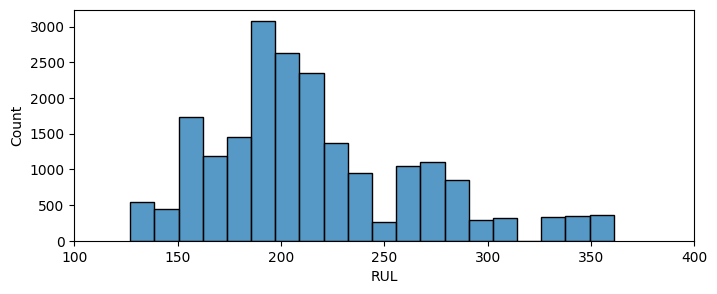

In [79]:
plt.figure(figsize = (8,3))
sns.histplot(failure_time ,bins = 20 )
plt.xlim(100 , 400)

<Axes: xlabel='RUL', ylabel='Count'>

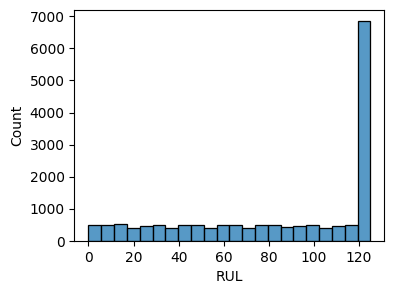

In [80]:
# clip to 125
y_train_clipped = y_train.clip(upper = 125)
plt.figure(figsize = (4,3))
sns.histplot(y_train_clipped)

In [81]:
y_train_clipped

,RUL
6244,125
9380,115
6105,115
15825,125
19025,125
...,...
11284,107
11964,125
5390,74
860,125


### Random Forest

In [82]:
random_search_forest.fit(X_train , y_train_clipped)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c98fa765b10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c98fa7af280>},
                   random_state=42, scoring='r2')

In [83]:
df_res_forest = pd.DataFrame(random_search_forest.cv_results_).sort_values('mean_test_score')
df_res_forest[['mean_test_score' , 'params']]

,mean_test_score,params
2,0.806742,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
9,0.806843,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
6,0.807803,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
5,0.808617,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
1,0.808670,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
0,0.808896,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_..."
4,0.809185,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
8,0.809808,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
7,0.809961,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
3,0.810120,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_..."


In [84]:
model_fine_forest = random_search_forest.best_estimator_
print(model_fine_forest)

# val score for random forest final model
y_pred = model_fine_forest.predict(X_val)
metrics(y_val , y_pred, label = 'val')

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=8)
for val set, 
RMSE: 17.987782106728552 
R2 Score: 81.26%


Text(0, 0.5, 'true y')

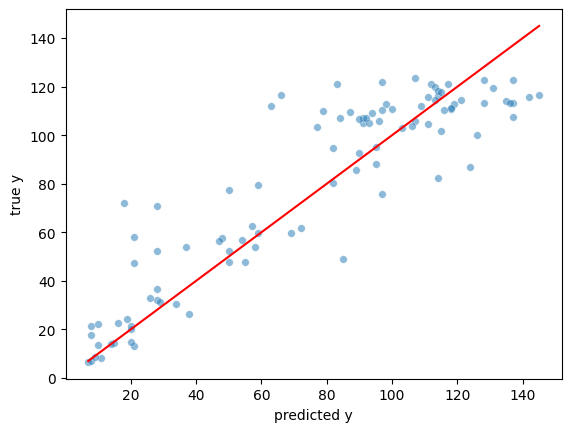

In [85]:
sns.scatterplot(x = y_val['RUL'] , y = y_pred  , s = 30 , alpha = 0.5)

sns.lineplot( x = [ min(y_val['RUL'])  , max(y_val['RUL']) ] ,
             y = [min(y_val['RUL']) , max(y_val['RUL'])] , color = 'red')


plt.xlabel('predicted y')
plt.ylabel('true y')

### SVM

In [91]:
svr.fit(X_train, y_train_clipped)

SVR()

In [92]:
y_pred = svr.predict(X_val)
metrics(y_val , y_pred, label = 'val')

for val set, 
RMSE: 19.630016041569036 
R2 Score: 77.69%


Text(0, 0.5, 'true y')

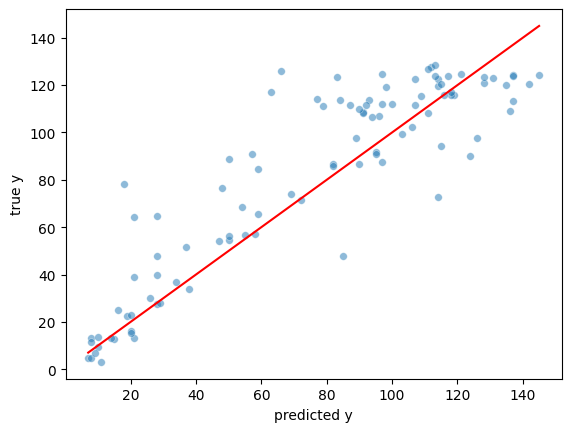

In [93]:
sns.scatterplot(x = y_val['RUL'] , y = y_pred  , s = 30 , alpha = 0.5)

sns.lineplot( x = [ min(y_val['RUL'])  , max(y_val['RUL']) ] ,
             y = [min(y_val['RUL']) , max(y_val['RUL'])] , color = 'red')


plt.xlabel('predicted y')
plt.ylabel('true y')

### XG Boost

In [94]:
xgb.fit(X_train, y_train_clipped)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [95]:
y_pred = xgb.predict(X_val)
metrics(y_val , y_pred, label = 'val')

for val set, 
RMSE: 18.175576378999747 
R2 Score: 80.87%


Text(0, 0.5, 'true y')

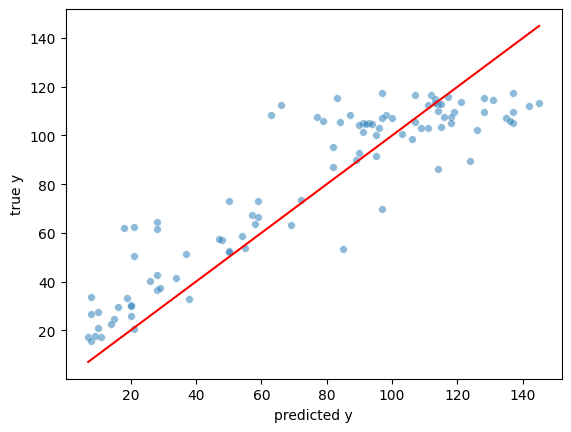

In [96]:
sns.scatterplot(x = y_val['RUL'] , y = y_pred  , s = 30 , alpha = 0.5)

sns.lineplot( x = [ min(y_val['RUL'])  , max(y_val['RUL']) ] ,
             y = [min(y_val['RUL']) , max(y_val['RUL'])] , color = 'red')


plt.xlabel('predicted y')
plt.ylabel('true y')